In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X, y = make_classification(n_samples=100000, n_features=32, n_informative=32,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000
The training dataset has 79200 records for the majority class and 800 records for the minority class.


In [ ]:
X_train_normal = X_train[np.where(y_train == 0)]
input = tf.keras.layers.Input(shape=(32,))
encoder = tf.keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu')])(input)
decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="sigmoid")])(encoder)
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(X_train_normal, X_train_normal, 
          epochs=10, 
          batch_size=64,
          validation_data=(X_test, X_test),
          shuffle=True)

Epoch 1/10
1238/1238 [==============================] - 4s 2ms/step - loss: 2.4685 - val_loss: 2.4703
Epoch 2/10
1238/1238 [==============================] - 3s 2ms/step - loss: 2.4665 - val_loss: 2.4693
Epoch 3/10
1238/1238 [==============================] - 3s 3ms/step - loss: 2.4649 - val_loss: 2.4684
Epoch 4/10
1238/1238 [==============================] - 3s 3ms/step - loss: 2.4637 - val_loss: 2.4676
Epoch 5/10
1238/1238 [==============================] - 3s 2ms/step - loss: 2.4625 - val_loss: 2.4654
Epoch 6/10
1238/1238 [==============================] - 3s 2ms/step - loss: 2.4617 - val_loss: 2.4648
Epoch 7/10
1238/1238 [==============================] - 3s 2ms/step - loss: 2.4611 - val_loss: 2.4642
Epoch 8/10
1238/1238 [==============================] - 3s 2ms/step - loss: 2.4605 - val_loss: 2.4637
Epoch 9/10
1238/1238 [==============================] - 4s 3ms/step - loss: 2.4602 - val_loss: 2.4634
Epoch 10/10
1238/1238 [==============================] - 3s 3ms/step - loss: 2.459

625/625 [==============================] - 2s 3ms/step
The prediction loss threshold for 2% of outliers is 3.46


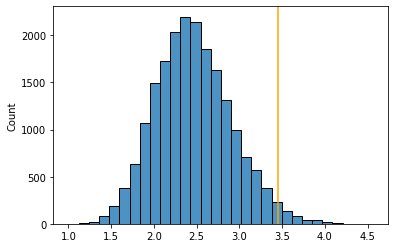

In [ ]:
prediction = autoencoder.predict(X_test)
prediction_loss = tf.keras.losses.mae(prediction, X_test)
loss_threshold = np.percentile(prediction_loss, 98)
print(f'The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}')
sns.histplot(prediction_loss, bins=30, alpha=0.8)
plt.axvline(x=loss_threshold, color='orange')

In [ ]:
threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]
print(classification_report(y_test, threshold_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19803
           1       0.00      0.01      0.00       197

    accuracy                           0.97     20000
   macro avg       0.50      0.49      0.49     20000
weighted avg       0.98      0.97      0.98     20000

